In [10]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from utils.utils_embedding import evaluate_embedding, dataframe_results, load_qa_dataset, plot_topk_results, evaluate_different_top_k
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Settings

In [11]:
# load dataset QA
dataset_name = "QA/gpt-35-turbo_dataset.json"
# results top-k
top_k = 5
model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
list_top_k = [1, 3, 5, 10, 20]

# Load QA synthetic dataset

In [12]:
it_dataset = load_qa_dataset(dataset_name)

2025-07-22 17:12:29.448 | INFO     | utils.utils_embedding:load_qa_dataset:16 - Loading dataset from QA/gpt-35-turbo_dataset.json


# View QA dataset sample

In [13]:
print(it_dataset.queries["6c67a361-1d84-4876-8ed5-72e11dd2f21e"])
print(it_dataset.relevant_docs["6c67a361-1d84-4876-8ed5-72e11dd2f21e"])
print(it_dataset.corpus["80b9998c-32d4-42f7-94a7-1a36155b382b"])

Qual è la data del documento di lavoro dei servizi della Commissione Europea sulla relazione per paese 2025 dell'Italia?
['80b9998c-32d4-42f7-94a7-1a36155b382b']
IT   IT 
 
 
 COMMISSIONE  
EUROPEA   
Bruxelles, 4.6.2025  
SWD(2025) 212 final  
 
DOCUMENTO DI LAVORO DEI SERVIZI DELLA COMMISSIONE  
Relazione per paese 2025 - Italia  
che accompagna il documento  
Raccomandazione di RACCOMANDAZIONE DEL CONSIGLIO  
sulle politiche economiche, sociali, occupazionali, strutturali e di bilancio dell'Italia  
{COM(2025)  212 final}


# HuggingFace: paraphrase-multilingual-MiniLM-L12-v2

In [14]:
embed_model_paraphrase_l12 = HuggingFaceEmbedding(model_name=model_name)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


# Different temperature levels (when generating QA synthetic dataset) affect the downstream embedding model performance

In [15]:
dataset_name = "QA/gpt-35-turbo_temperature_07_dataset.json"

temperature_level_07 = dataset_name.split("_")[-2]

it_dataset_temperature = load_qa_dataset(dataset_name)

df_results_no_finetuning_temp_07 = evaluate_different_top_k(it_dataset_temperature, embed_model_paraphrase_l12, list_top_k)

2025-07-22 17:12:32.306 | INFO     | utils.utils_embedding:load_qa_dataset:16 - Loading dataset from QA/gpt-35-turbo_temperature_07_dataset.json
2025-07-22 17:12:32.308 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=1
100%|██████████| 222/222 [00:02<00:00, 83.55it/s]
2025-07-22 17:12:35.986 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=3
100%|██████████| 222/222 [00:02<00:00, 81.80it/s]
2025-07-22 17:12:39.694 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=5
100%|██████████| 222/222 [00:02<00:00, 78.58it/s]
2025-07-22 17:12:43.524 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=10
100%|██████████| 222/222 [00:02<00:00, 78.96it/s]
2025-07-22 17:12:47.325 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=20
100%|██████████| 222/222 [00:02<00:00, 77.76it/s]


In [16]:
dataset_name = "QA/gpt-35-turbo_temperature_01_dataset.json"

temperature_level_01 = dataset_name.split("_")[-2]

it_dataset_temperature = load_qa_dataset(dataset_name)

df_results_no_finetuning_temp_01 = evaluate_different_top_k(it_dataset_temperature, embed_model_paraphrase_l12, list_top_k)

2025-07-22 17:12:51.206 | INFO     | utils.utils_embedding:load_qa_dataset:16 - Loading dataset from QA/gpt-35-turbo_temperature_01_dataset.json
2025-07-22 17:12:51.210 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=1
100%|██████████| 222/222 [00:02<00:00, 77.21it/s]
2025-07-22 17:12:55.076 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=3
100%|██████████| 222/222 [00:02<00:00, 80.43it/s]
2025-07-22 17:12:58.831 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=5
100%|██████████| 222/222 [00:02<00:00, 81.48it/s]
2025-07-22 17:13:02.553 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=10
100%|██████████| 222/222 [00:02<00:00, 83.05it/s]
2025-07-22 17:13:06.220 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=20
100%|██████████| 222/222 [00:02<00:00, 79.45it/s]


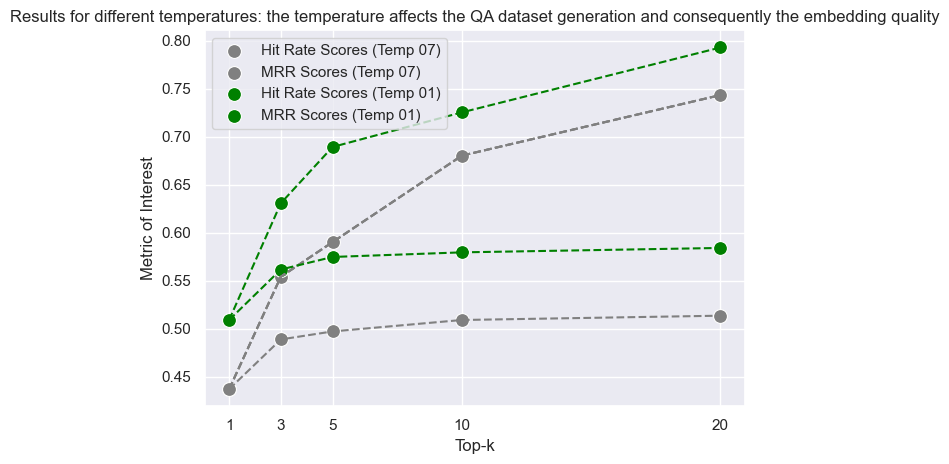

In [18]:
sns.lineplot(data=df_results_no_finetuning_temp_07, x="top_k", y="is_hit", color="gray", linestyle='--')
sns.lineplot(data=df_results_no_finetuning_temp_07, x="top_k", y="mrr", color="gray", linestyle='--')
sns.scatterplot(data=df_results_no_finetuning_temp_07, x="top_k", y="is_hit", color="gray", s=100, label=f"Hit Rate Scores (Temp {temperature_level_07})", marker='o')
sns.scatterplot(data=df_results_no_finetuning_temp_07, x="top_k", y="mrr", color="gray", s=100, label=f"MRR Scores (Temp {temperature_level_07})", marker='o')

sns.lineplot(data=df_results_no_finetuning_temp_01, x="top_k", y="is_hit", color="green", linestyle='--')
sns.lineplot(data=df_results_no_finetuning_temp_01, x="top_k", y="mrr", color="green", linestyle='--')
sns.scatterplot(data=df_results_no_finetuning_temp_01, x="top_k", y="is_hit", color="green", s=100, label=f"Hit Rate Scores (Temp {temperature_level_01})", marker='o')
sns.scatterplot(data=df_results_no_finetuning_temp_01, x="top_k", y="mrr", color="green", s=100, label=f"MRR Scores (Temp {temperature_level_01})", marker='o')

plt.title("Results for different temperatures: the temperature affects the QA dataset generation and consequently the embedding quality")
plt.xlabel("Top-k")
plt.ylabel("Metric of Interest")
plt.xticks(ticks=df_results_no_finetuning_temp_07["top_k"].unique())
plt.grid(True)
plt.tight_layout()
plt.show()